# Pymaceuticals Inc.
---

### Analysis

- The study has an even balance between male and female mice (51% male, 49% female). Making it easy to do further research based on gender if we want to analyze how each drug affects males vs females. 
- As we see in the lines and scatterplot section - Capomulin is an effective drug to reduce the volume of the rats' tumors. 
- Capomulin also recorded the most timepoints out of all of the regimens. 
- There is a significant correlation between weight and tumor volume with the correlation equal to .84. 
 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_results_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
data_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice.
total_mice = data_results_df["Mouse ID"].nunique()
total_mice

249

In [27]:
data_results_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [28]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_results_df.loc[data_results_df.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicate_mice = duplicate_mice['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_mice = data_results_df[data_results_df[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_mice_data = data_results_df.loc[data_results_df['Mouse ID'] == 'g989']
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates_df = data_results_df[data_results_df['Mouse ID'].isin(duplicate_mice)==False]
no_duplicates_df.head()      


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice in the clean DataFrame.
len(no_duplicates_df["Mouse ID"].unique())

248

## Summary Statistics

In [32]:
total_regimen = data_results_df['Drug Regimen'].unique()
total_regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [33]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = no_duplicates_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = no_duplicates_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = no_duplicates_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = no_duplicates_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = no_duplicates_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_summary_df = pd.DataFrame({'Mean Tumor Volume': mean, 'Tumor Volume Variance': variance, 
                                 'Tumor Volume Standard Deviation': std, 'Tumor Volume Standard Error': sem})

tumor_summary_df

,Mean Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

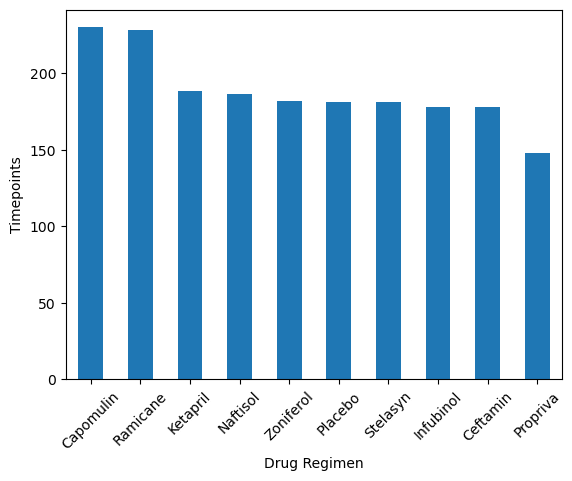

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#x_axis = np.arange(len(variable))
#plt.bar(x_axis, variable, color='r', alpha=0.5, align="center")

total_regimen = no_duplicates_df['Drug Regimen'].value_counts()
total_regimen.plot(kind = 'bar')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=45)
plt.ylabel("Timepoints")
plt.show()

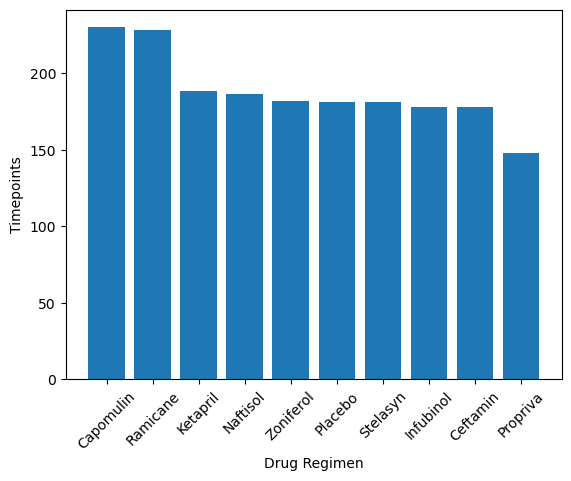

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_regimen = no_duplicates_df['Drug Regimen'].value_counts()
plt.bar(total_regimen.index.values, total_regimen.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=45)
plt.ylabel('Timepoints')
plt.show()

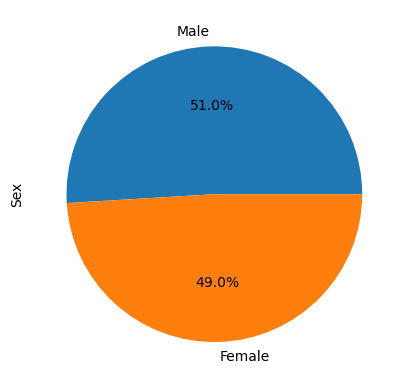

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_plot = no_duplicates_df.Sex.value_counts()
gender_plot.plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

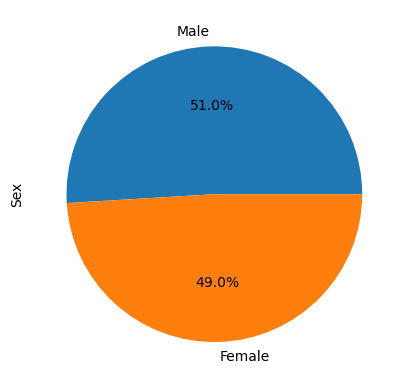

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot = no_duplicates_df.Sex.value_counts()
plt.pie(gender_plot.values,labels = gender_plot.index.values,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = no_duplicates_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tumor_df = max_tumor.merge(no_duplicates_df, on = ['Mouse ID','Timepoint'],how = "left")

max_tumor_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = max_tumor_df.loc[max_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    
    # add subset 
    final_tumor_volume.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    inter_quartile_range = upper_quartile-lower_quartile
    lower_bound = lower_quartile - (1.5*inter_quartile_range)
    upper_bound = upper_quartile + (1.5*inter_quartile_range)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug}'s Outliers': {outliers}")

Ramicane's Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Outliers': 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Placebo's Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)
Stelasyn's Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)
Zoniferol's Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)
Ketapril's Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)
Propriva's Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)
Naftisol's Outliers': Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/s2/xh66s_3s7hq6cc3bmyv39k8r0000gn/T/ipykernel_17440/3893666019.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_volume.append(final_tumor_volume)
/var/folders/s2/xh66s_3s7hq6cc3bmyv39k8r0000gn/T/ipykernel_17440/3893666019.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_volume.append(final_tumor_volume)
/var/folders/s2/xh66s_3s7hq6cc3bmyv39k8r0000gn/T/ipykernel_17440/3893666019.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_volume.append(final_tumor_volume)
/var/folders/s2/xh66s_3s7hq6cc3bmyv39k8r0000gn/T/ipykernel_17440/3893666019.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

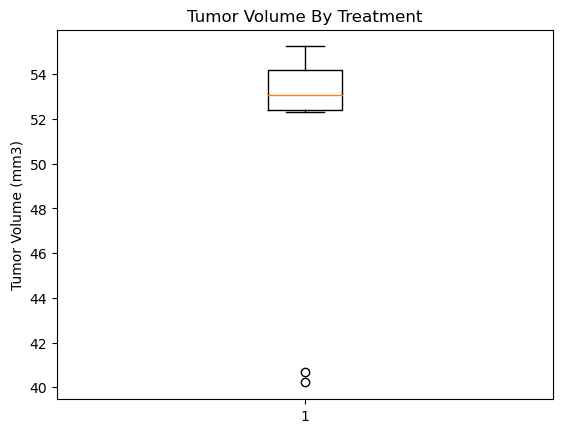

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#capomulin_weight_volume = capomulin_treatment_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

treatments = no_duplicates_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
x_values = no_duplicates_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume By Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')

xticks = ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])  
ax1.boxplot(treatments)
plt.show()


## Line and Scatter Plots

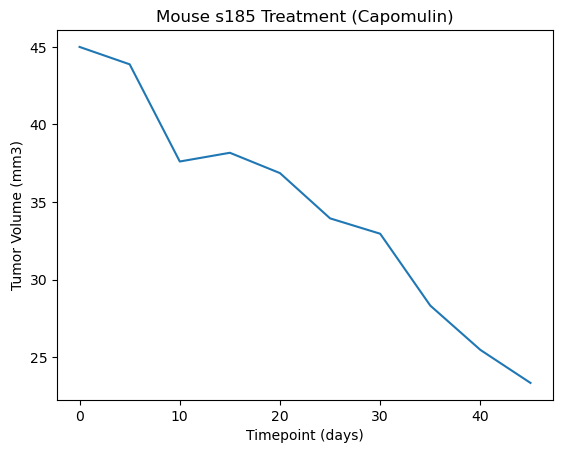

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_treatment_df = no_duplicates_df.loc[no_duplicates_df['Drug Regimen'] == "Capomulin"]
mouse_s185 = capomulin_treatment_df.loc[capomulin_treatment_df['Mouse ID']== 's185']
plt.plot(mouse_s185['Timepoint'],mouse_s185['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse s185 Treatment (Capomulin)')
plt.show()

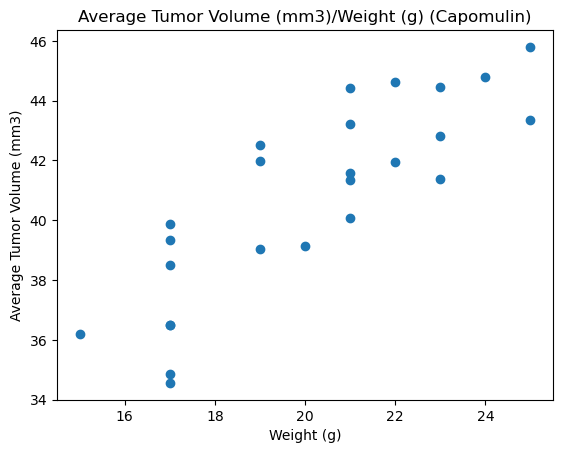

In [43]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_treatment_df = no_duplicates_df.loc[no_duplicates_df['Drug Regimen'] == "Capomulin"]
capomulin_weight_volume = capomulin_treatment_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_weight_volume['Weight (g)'],capomulin_weight_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3)/Weight (g) (Capomulin)')
plt.show()

## Correlation and Regression

Weight/Tumor Volume Correlation: 0.842


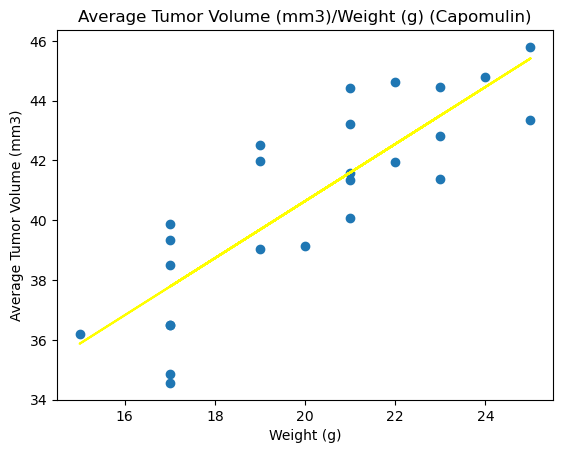

In [45]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(capomulin_weight_volume['Weight (g)'],capomulin_weight_volume['Tumor Volume (mm3)'])[0],3)
print(f"Weight/Tumor Volume Correlation: {correlation}")

linear_regress = st.linregress(capomulin_weight_volume['Weight (g)'],capomulin_weight_volume['Tumor Volume (mm3)'])

y_values = capomulin_weight_volume['Weight (g)'] * linear_regress[0] + linear_regress[1]

capomulin_treatment_df = no_duplicates_df.loc[no_duplicates_df['Drug Regimen'] == "Capomulin"]
capomulin_weight_volume = capomulin_treatment_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_weight_volume['Weight (g)'],capomulin_weight_volume['Tumor Volume (mm3)'])


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(capomulin_weight_volume['Weight (g)'],y_values,color="yellow")
plt.title('Average Tumor Volume (mm3)/Weight (g) (Capomulin)')


plt.show()